## Import essential libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Load the dataset

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [4]:
df.Grade.unique()

array(['A++ ', 'A+ ', 'A ', '\xa0 ', 'A- ', 'B+ '], dtype=object)

In [5]:
#find right whitespace
df['Grade'][0]

'A++ '

In [6]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

### Remove white spaces from df

In [7]:
df['Rank'] = df['Rank'].apply(lambda x:  x.rstrip())
df['Grade'] = df['Grade'].apply(lambda x:  x.rstrip())
df['Channel name'] = df['Channel name'].apply(lambda x:  x.rstrip())
df['Video Uploads'] = df['Video Uploads'].apply(lambda x:  x.rstrip())
df['Subscribers'] = df['Subscribers'].apply(lambda x:  x.rstrip())

In [8]:
#Number of channels whose Subscriber data is not available 
df['Subscribers'][df['Subscribers']=='--'].count()

387

In [9]:
#Number of channels whose Video Uploads is not available 
df['Video Uploads'][df['Video Uploads']=='--'].count()

6

### Remove channels which do not have all data 

In [10]:
#remove no data row
df = df[df['Subscribers'] != '--']
df = df[df['Video Uploads'] != '--']

In [11]:
len(df)

4610

## Convert Subscribers and video uploads fields

In [12]:
#chack the type of fileds
print( type(df['Subscribers'][0]) )
print( type(df['Video Uploads'][0]) )

<class 'str'>
<class 'str'>


In [13]:
#converting str to integer
df['Subscribers'] = df['Subscribers'].apply(lambda x: int(x))
df['Video Uploads'] = df['Video Uploads'].apply(lambda x: int(x))

### Check univariate outliers are available or not

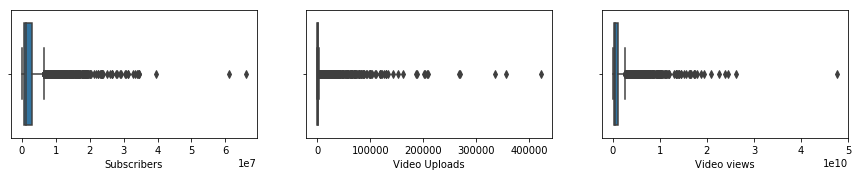

In [122]:
fig = plt.figure(figsize=(15,8))

plt.subplot(331)
sb.boxplot(df['Subscribers'])

plt.subplot(332)
sb.boxplot(df['Video Uploads'])

plt.subplot(333)
sb.boxplot(df['Video views'])

### Check bivariate outliers are available or not

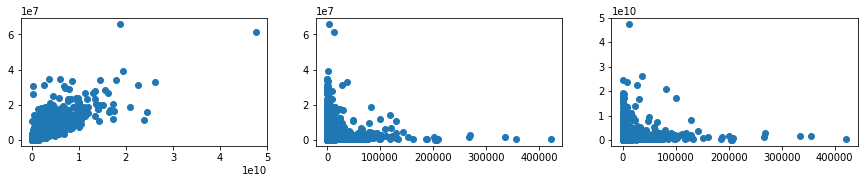

In [15]:
fig = plt.figure(figsize=(15,8))

plt.subplot(331)
plt.scatter(df['Video views'], df['Subscribers'])  

plt.subplot(332)
plt.scatter(df['Video Uploads'], df['Subscribers'])  

plt.subplot(333)
plt.scatter(df['Video Uploads'], df['Video views'])  

In [16]:
df['Grade'][0]

'A++'

In [17]:
df.Grade.unique()

array(['A++', 'A+', 'A', 'A-', 'B+'], dtype=object)

In [18]:
#Count channels with respect to Grade 
df['Grade'].value_counts()

B+     2722
A-      941
A       897
A+       40
A++      10
Name: Grade, dtype: int64

### Percetange of channels with Grades

([<matplotlib.patches.Wedge at 0x20610b1f710>,
 [Text(-0.3084016017929751, 1.0558827832726165, 'B+'),
  Text(-0.388717152747084, -1.0290281702461797, 'A-'),
  Text(0.8557247552361925, -0.6911838708158333, 'A'),
  Text(1.5986626960273909, -0.06540324403601812, 'A+'),
  Text(1.5999628475290002, -0.01090350984287565, 'A++')],
 [Text(-0.16821905552344096, 0.5759360636032453, '59.0%'),
  Text(-0.2120275378620458, -0.5612880928615525, '20.4%'),
  Text(0.4667589574015595, -0.3770093840813636, '19.5%'),
  Text(1.099080603518831, -0.04496473027476246, '0.9%'),
  Text(1.0999744576761876, -0.007496163016977009, '0.2%')])

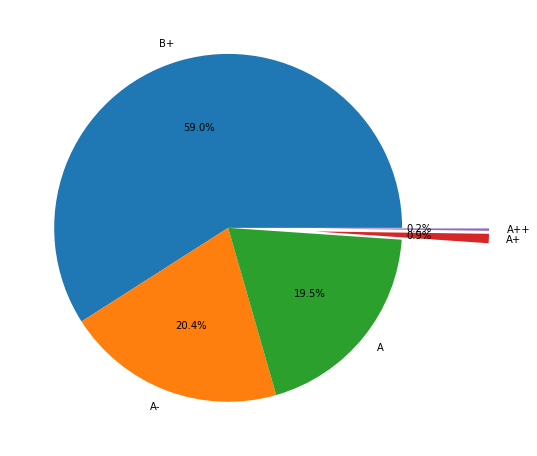

In [130]:
fig = plt.figure(figsize=(23,8))
explode = (0, 0, 0, 0.5,0.5)
plt.pie(df['Grade'].value_counts(), labels=['B+','A-','A','A+','A++'], explode=explode,autopct='%1.1f%%')

## Top Subscribers Channels

In [21]:
#highest subscribers channel
df[df['Subscribers']==df['Subscribers'].max()]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
1470,"1,471st",A-,PewDiePie,3601,65995310,18684630003


In [44]:
#Top five subscribers channels
top5sub = df.sort_values('Subscribers', ascending=False).head()
top5sub

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
1470,"1,471st",A-,PewDiePie,3601,65995310,18684630003
1,2nd,A++,T-Series,12661,61196302,47548839843
11,12th,A+,Canal KondZilla,822,39409726,19291034467
174,175th,A,Dude Perfect,185,34489432,6095981611
3222,"3,223rd",B+,HolaSoyGerman.,137,34480357,3617584451


## Low Subscribers Channels

In [23]:
#lowest subscribers channel
df[df['Subscribers']==df['Subscribers'].min()]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4096,"4,097th",B+,Xiaomi France,17,301,12943662


In [51]:
#lowest subscribers channels
low5sub = df.sort_values('Subscribers', ascending=True).head()
low5sub

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4096,"4,097th",B+,Xiaomi France,17,301,12943662
92,93rd,A,hairong zheng,492,394,254252482
3516,"3,517th",B+,Jianpeng Li,232,437,70635195
3160,"3,161st",B+,Ron Funches - Topic,21,453,13932203
2287,"2,288th",B+,Christian Nodal - Topic,30,471,17868274


<BarContainer object of 5 artists>

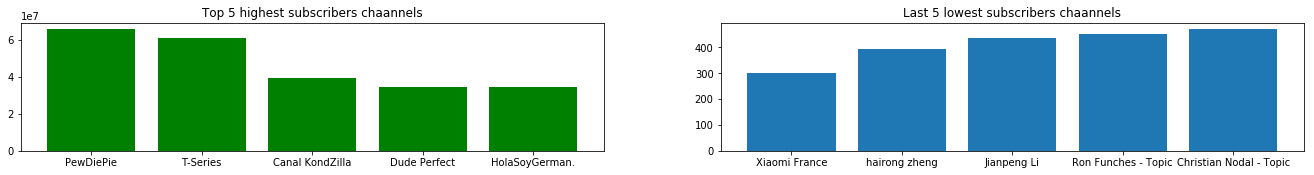

In [150]:
fig = plt.figure(figsize=(23,8))

plt.subplot(321)
plt.title("Top 5 highest subscribers chaannels")
plt.bar(top5sub['Channel name'], top5sub['Subscribers'], color="green")

plt.subplot(322)
plt.title("Last 5 lowest subscribers chaannels")
plt.bar(low5sub['Channel name'], low5sub['Subscribers'])

## Most viewable channels

In [132]:
topviewable = df.sort_values('Video views', ascending=False)
topviewable.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
1,2nd,A++,T-Series,12661,61196302,47548839843
4,5th,A++,WWE,36756,32852346,26273668433
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
6,7th,A++,netd müzik,8500,11373567,23898730764
3,4th,A++,SET India,27323,31180559,22675948293


[Text(0, 0, 'T-Series'),
 Text(0, 0, 'WWE'),
 Text(0, 0, 'Ryan ToysReview'),
 Text(0, 0, 'netd müzik'),
 Text(0, 0, 'SET India'),
 Text(0, 0, 'Zee TV'),
 Text(0, 0, 'Canal KondZilla'),
 Text(0, 0, 'PewDiePie'),
 Text(0, 0, 'JustinBieberVEVO'),
 Text(0, 0, 'Little Baby Bum - Nursery Rhymes &…'),
 Text(0, 0, 'Get Movies'),
 Text(0, 0, 'ABS-CBN Entertainment'),
 Text(0, 0, 'Movieclips'),
 Text(0, 0, 'Маша и Медведь'),
 Text(0, 0, 'El Reino Infantil'),
 Text(0, 0, 'KatyPerryVEVO'),
 Text(0, 0, 'TaylorSwiftVEVO'),
 Text(0, 0, 'ChuChu TV Nursery Rhymes & Kids…'),
 Text(0, 0, 'shakiraVEVO'),
 Text(0, 0, 'Ed Sheeran'),
 Text(0, 0, 'FunToys Collector Disney Toys…'),
 Text(0, 0, 'WorkpointOfficial'),
 Text(0, 0, 'BuzzFeedVideo'),
 Text(0, 0, 'DanTDM'),
 Text(0, 0, 'GMM GRAMMY OFFICIAL')]

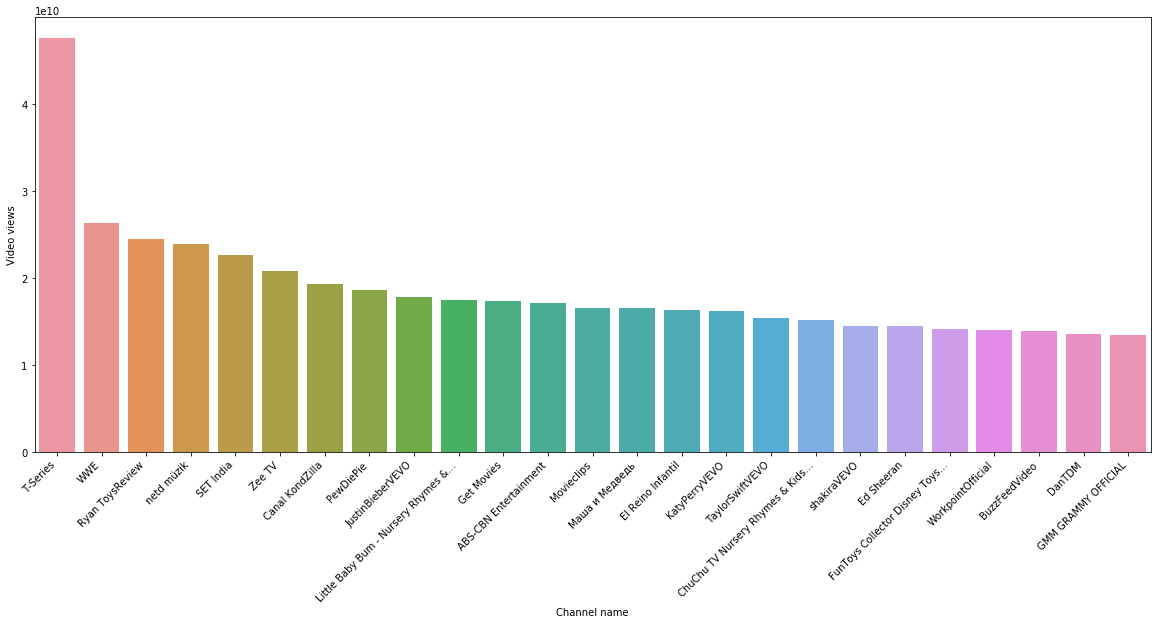

In [146]:
fig = plt.figure(figsize=(20,8))

ax = sb.barplot(topviewable['Channel name'][0:25], topviewable['Video views'][0:25])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

## Lowest viewable channels

In [98]:
lowviewable = df.sort_values('Video views', ascending = True)
lowviewable.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
2404,"2,405th",B+,ItsHARSH007 Gaming,1,23499,75
1294,"1,295th",A-,VideoClipVietNam,5,56096,8496
1350,"1,351st",A-,GumTea TV,14,114244,9495
2972,"2,973rd",B+,DICHARA,23,48687,74014
954,955th,A,Amit choudhary,18,201943,222996


## Most video uploads channels 

In [148]:
df.sort_values('Video Uploads', ascending=False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
3453,"3,454th",B+,AP Archive,422326,746325,548619569
1149,"1,150th",A-,YTN NEWS,355996,820108,1640347646
2223,"2,224th",B+,SBS Drama,335521,1418619,1565758044
323,324th,A,GMA News,269065,2599175,2786949164
2956,"2,957th",B+,MLB,267649,1434206,1329206392


## Few video uploads channels 

In [28]:
df.sort_values('Video Uploads', ascending=True).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4474,"4,475th",B+,hyghhopes,1,15325,14842098
628,629th,A,cocoz toon,1,2162992,333012122
4100,"4,101st",B+,DenzelCurryVEVO,1,8012,25878252
4975,"4,976th",B+,Funny Kids,1,150091,21933876
2404,"2,405th",B+,ItsHARSH007 Gaming,1,23499,75


## Find channels which have valuable contents, though less video uploads but higher subscribers and higher views


In [31]:
#find the 90% percentile of subscribers , video views
#find the 50% percentile of video uploads

import math

subscribers = math.ceil(np.percentile(df['Subscribers'] , 90))
Videoviews = math.ceil(np.percentile(df['Video views'] , 90))
Videouploads = math.ceil(np.percentile(df['Video Uploads'] , 50))

print('90% Percentile of subscribers', subscribers)
print('90% Percentile of Video views', Videoviews)
print('50% Percentile of Video uploads', Videouploads)

df[ (df['Subscribers'] > subscribers) & (df['Video views'] > Videoviews) & (df['Video Uploads'] < Videouploads)].head()

90% Percentile of subscribers 6177261
90% Percentile of Video views 2549672122
50% Percentile of Video uploads 464


,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
13,14th,A+,Ozuna,50,18824912,8727783225
26,27th,A+,ibighit,277,16924523,3437613314
39,40th,A+,CKN Toys,431,8816598,7498069721
49,50th,A+,Infobells - Hindi,169,7546139,3919961629


## Channels that have less subscribers but higher viewers

In [32]:
df[ (df['Subscribers'] < math.floor(np.percentile(df['Subscribers'], 50))) & (df['Video views'] > Videoviews)]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
418,419th,A,Princess Hime Suite…,1351,1212057,2734803314


## Channels are consistently active but not much people follow these channels 

In [33]:
df[ (df['Subscribers'] < math.floor(np.percentile(df['Subscribers'], 10))) & 
   (df['Video views'] < math.floor(np.percentile(df['Video views'], 10))) &
  (df['Video Uploads'] > math.floor(np.percentile(df['Video Uploads'], 95))) ]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
3216,"3,217th",B+,Various Artists - Topic,203934,26013,13049365
4583,"4,584th",B+,Various Artists - Topic,207072,30224,28670469


## Channels are not active for long time

In [34]:
df[ (df['Subscribers'] < math.floor(np.percentile(df['Subscribers'], 1))) & 
   (df['Video views'] < math.floor(np.percentile(df['Video views'], 1))) &
  (df['Video Uploads'] < math.floor(np.percentile(df['Video Uploads'], 99))) ].head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
334,335th,A,ninja,6,547,2127264
3467,"3,468th",B+,Cristian Rocha,11,9106,12829482
3780,"3,781st",B+,Kali Uchis - Topic,46,6076,13207637
4096,"4,097th",B+,Xiaomi France,17,301,12943662
4214,"4,215th",B+,밥티비,162,7549,12639641


## Popular channels

In [35]:
df[ (df['Subscribers'] > math.floor(np.percentile(df['Subscribers'], 99))) & 
   (df['Video views'] > math.floor(np.percentile(df['Video views'], 99))) &
  (df['Video Uploads'] > math.floor(np.percentile(df['Video Uploads'], 90))) ].head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
126,127th,A,TheEllenShow,9066,27765423,13403860667


## Total subscribers on these Youtube channels

In [36]:
df['Subscribers'].sum()

12085240485

## Total Video Uploads on these Youtube channels

In [37]:
df['Video Uploads'].sum()

18835289

## Calculate statistics gradewise

In [38]:
grade_grp = df.groupby('Grade')

In [39]:
grade_grp.get_group('A++').describe()

,Video Uploads,Subscribers,Video views
count,10.000000,1.000000e+01,1.000000e+01
mean,37450.700000,2.228176e+07,2.119909e+10
std,36001.506706,1.630036e+07,1.180364e+10
min,373.000000,2.841811e+06,2.591830e+09
25%,9540.250000,1.313264e+07,1.676422e+10
50%,28783.000000,1.795133e+07,2.177287e+10
75%,65144.250000,2.819498e+07,2.436326e+10
max,100147.000000,6.119630e+07,4.754884e+10


## Analysis of channels in terms of subscribers, viewers, uploaded contents through gradewise

{'bodies': [<matplotlib.collections.PolyCollection at 0x206742247f0>],
 'cbars': <matplotlib.collections.LineCollection at 0x2067422b128>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x20674224c18>,
 'cmeans': <matplotlib.collections.LineCollection at 0x20674224780>,
 'cmins': <matplotlib.collections.LineCollection at 0x20674224e80>}

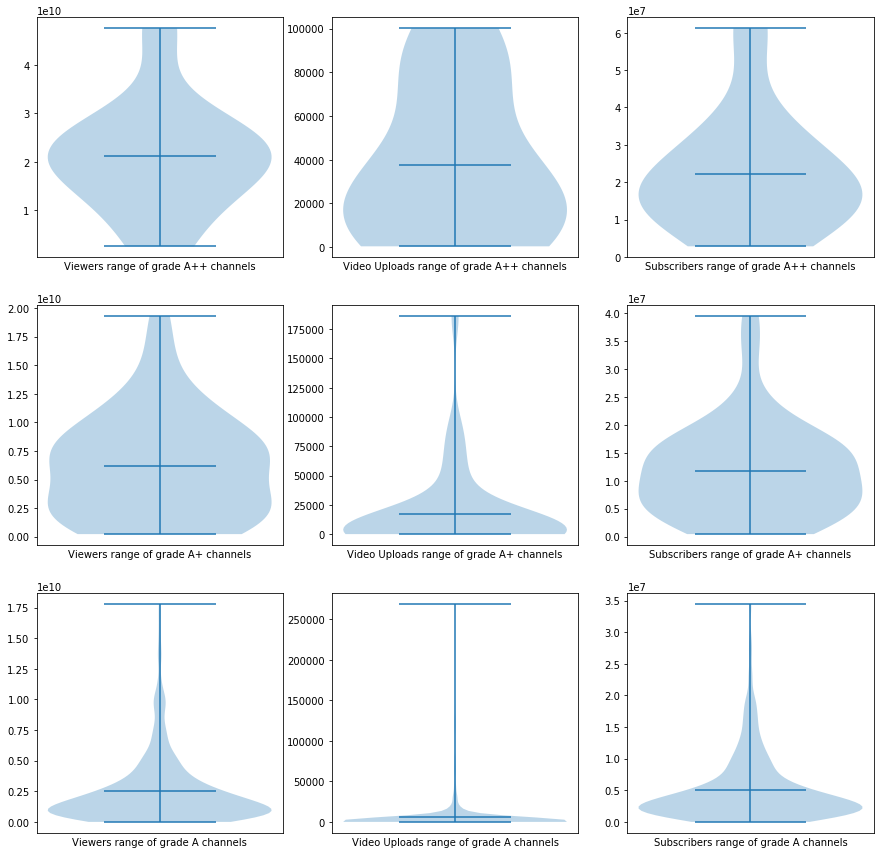

In [40]:
fig = plt.figure(figsize=(15,15))

plt.subplot(331)
plt.xlabel("Viewers range of grade A++ channels")
plt.xticks([])
plt.violinplot(df['Video views'][df['Grade'] == 'A++'], showmeans=True)
plt.subplot(332)
plt.xticks([])
plt.xlabel("Video Uploads range of grade A++ channels")
plt.violinplot(df['Video Uploads'][df['Grade'] == 'A++'], showmeans=True)
plt.subplot(333)
plt.xticks([])
plt.xlabel("Subscribers range of grade A++ channels")
plt.violinplot(df['Subscribers'][df['Grade'] == 'A++'], showmeans=True)

plt.subplot(334)
plt.xticks([])
plt.xlabel("Viewers range of grade A+ channels")
plt.violinplot(df['Video views'][df['Grade'] == 'A+'], showmeans=True)
plt.subplot(335)
plt.xticks([])
plt.xlabel("Video Uploads range of grade A+ channels")
plt.violinplot(df['Video Uploads'][df['Grade'] == 'A+'], showmeans=True)
plt.subplot(336)
plt.xticks([])
plt.xlabel("Subscribers range of grade A+ channels")
plt.violinplot(df['Subscribers'][df['Grade'] == 'A+'], showmeans=True)

plt.subplot(337)
plt.xticks([])
plt.xlabel("Viewers range of grade A channels")
plt.violinplot(df['Video views'][df['Grade'] == 'A'], showmeans=True)
plt.subplot(338)
plt.xticks([])
plt.xlabel("Video Uploads range of grade A channels")
plt.violinplot(df['Video Uploads'][df['Grade'] == 'A'], showmeans=True)
plt.subplot(339)
plt.xlabel("Subscribers range of grade A channels")
plt.xticks([])
plt.violinplot(df['Subscribers'][df['Grade'] == 'A'], showmeans=True)


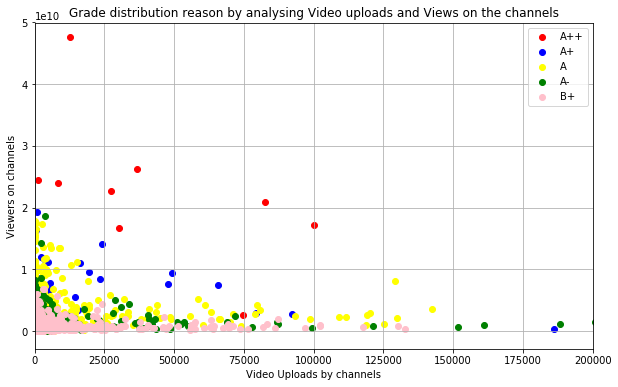

In [119]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df['Video Uploads'][df['Grade'] == 'A++'],df['Video views'][df['Grade'] == 'A++'],color='red')
plt.scatter(df['Video Uploads'][df['Grade'] == 'A+'],df['Video views'][df['Grade'] == 'A+'],color='blue')
plt.scatter(df['Video Uploads'][df['Grade'] == 'A'],df['Video views'][df['Grade'] == 'A'],color='yellow')
plt.scatter(df['Video Uploads'][df['Grade'] == 'A-'],df['Video views'][df['Grade'] == 'A-'],color='green')
plt.scatter(df['Video Uploads'][df['Grade'] == 'B+'],df['Video views'][df['Grade'] == 'B+'],color='pink')

plt.xlim([0,200000])
plt.title("Grade distribution reason by analysing Video uploads and Views on the channels")
plt.xlabel('Video Uploads by channels')
plt.ylabel('Viewers on channels')

plt.legend(['A++','A+','A','A-','B+'])
plt.grid()